# Project Name - AirBnb Booking Analysis

Project Type - EDA<br>
Contribution - Team<br>
Team Member 1 - Divyansh Singh Negi<br>
Team Member 2 -Saurabhi<br>

# Project Summary -

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

This project aims to analyze hotel booking data to gain insights and make data-driven decisions for improving the hotel's operations and customer experience. By examining various aspects of the data, such as booking patterns, customer preferences, and revenue trends, the project seeks to provide valuable information to optimize resource allocation, marketing strategies, and overall hotel performance.

Objectives: 1.Understand booking patterns<br> 2.Customer segmentation<br> 3.Revenue analysis <br>4.Demand forecasting <br>5.Customer feedback analysis <br>6.Competitor analysis<br>

# Problem Statement

Explore and analyze the data to discover key understandings (not limited to these) such as:

- What can we learn about different hosts and areas?

- What can we learn from predictions? (ex: locations, prices, reviews, etc)

- Which hosts are the busiest and why?

- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

# Code :

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
url='https://drive.google.com/file/d/1ioU5r9KEYSfwgfUi22SclVkx4l1a_8ou/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [38]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018.0,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019.0,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019.0,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018.0,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
df.shape

(48895, 16)

In [7]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### OBSERVATIONS :

- Total 16 columns are present in the dataset.
- total observations are 48895.
- Min of Price variable is 0, max is 10000.
- Mean price is 152.
- On an average people stay 7 days in a room.
- There are total four columns with null values.

# Missing value handling :

In [9]:
df.reviews_per_month.fillna(value = 0, inplace = True)

In [10]:
df['last_review'] = pd.to_datetime(df['last_review'], format = '%Y-%m-%d')
df.last_review = df['last_review'].dt.year.astype('object')
df.last_review.fillna(value = 'Never', inplace = True)

In [11]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

#### Since 'name' and 'host_name' occupy a very small margin of the data and won't effect our analysis we let them be. 

In [12]:
df.groupby(['last_review']).count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
last_review,,,,,,,,,,,,,,,
2011.0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
2012.0,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
2013.0,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
2014.0,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
2015.0,1393,1391,1393,1390,1393,1393,1393,1393,1393,1393,1393,1393,1393,1393,1393
2016.0,2707,2704,2707,2706,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707
2017.0,3205,3205,3205,3203,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205,3205
2018.0,6050,6049,6050,6048,6050,6050,6050,6050,6050,6050,6050,6050,6050,6050,6050
2019.0,25209,25209,25209,25201,25209,25209,25209,25209,25209,25209,25209,25209,25209,25209,25209


# Analysis begin :

In [13]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [55]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018.0,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019.0,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,Never,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019.0,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018.0,0.10,1,0


# 1. Location of neighbouthood

Text(0.5, 0, 'Neighbourhood')

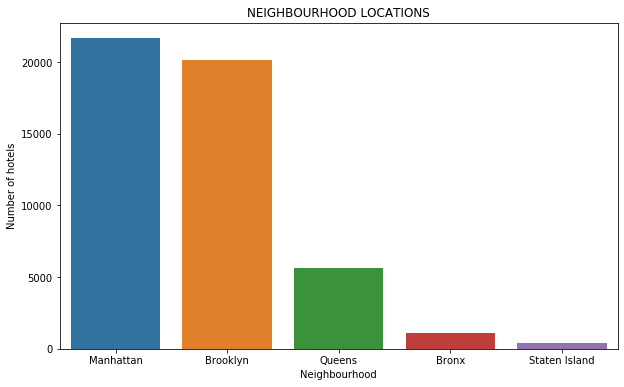

In [27]:
df1 = df.groupby(['neighbourhood_group'],as_index=False).count()
fig, ax = plt.subplots(figsize=(10, 6))
a=sns.barplot(data=df1, x="neighbourhood_group",y='id',order=df1.sort_values('id',ascending = False).neighbourhood_group)

a.set_title('NEIGHBOURHOOD LOCATIONS')
a.set_ylabel('Number of hotels')
a.set_xlabel('Neighbourhood')

#### Observation :
- that most of the hotels are located in the Manhattan Area
- And least hotels are in the State Island area

# 2. Types of room in each location

Text(0.5, 0, 'Neighbourhood')

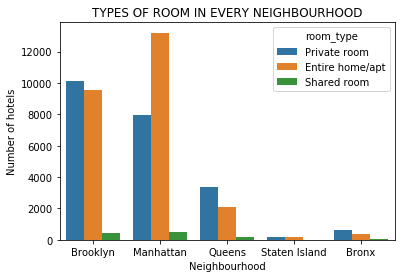

In [57]:
# fig, ax = plt.subplots(figsize=(12, 6))
a=sns.countplot(data=df, x="neighbourhood_group", hue="room_type")
a.set_title('TYPES OF ROOM IN EVERY NEIGHBOURHOOD')
a.set_ylabel('Number of hotels')
a.set_xlabel('Neighbourhood')

#### Observation :
- Most rooms are of Entire home/apt type
- Shared rooms are the least in numbers
- This might mean that the entire home/apt type rooms are in most demand.

# 3. Types of room and the mean prices per person

Text(0.5, 0, 'Type of Rooms')

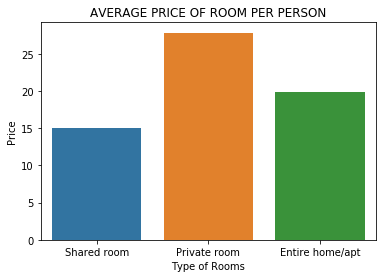

In [58]:
df2=df.groupby(['room_type'],as_index=False).agg({'price':"mean","calculated_host_listings_count":"mean"}).sort_values(by='price')
df2['avg. pay per person'] = df2['price']/df2['calculated_host_listings_count']
# fig, ax = plt.subplots(figsize=(12, 8))
a=sns.barplot(data=df2, x="room_type", y="avg. pay per person")
a.set_title('AVERAGE PRICE OF ROOM PER PERSON')
a.set_ylabel('Price')
a.set_xlabel('Type of Rooms')

#### Observation:
- Shared rooms are the most affordable per person
- Private rooms are the most expensive per person

# 4. Avg. time stay in each type of room

Text(0.5, 0, 'Type of Rooms')

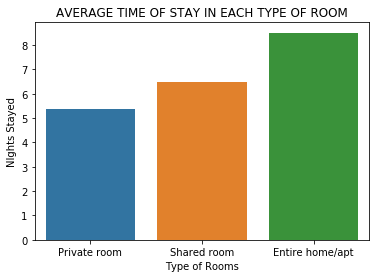

In [59]:
df3=df.groupby(['room_type'],as_index=False).agg({'minimum_nights':"mean"}).sort_values(by='minimum_nights')
# fig, ax = plt.subplots(figsize=(12, 8))
a= sns.barplot(data=df3, x="room_type", y="minimum_nights")
a.set_title('AVERAGE TIME OF STAY IN EACH TYPE OF ROOM')
a.set_ylabel('NIghts Stayed')
a.set_xlabel('Type of Rooms')

#### Observation :
- People who book Entire home/apt stay longer as compared to People who book Private room

# 5. Hotels used every year

Text(0.5, 0, 'Count of hotels booked')

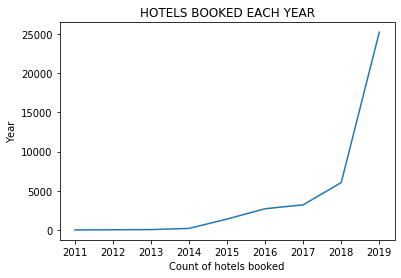

In [60]:
df4=df.groupby(['last_review'],as_index=False).count()
df4.drop([9],axis=0,inplace=True)
df4
# fig, ax = plt.subplots(figsize=(12, 8))
a=sns.lineplot(data=df4, x="last_review", y="id")
a.set_title('HOTELS BOOKED EACH YEAR')
a.set_ylabel('Year')
a.set_xlabel('Count of hotels booked')

#### Observation :
- The usage of hotels has significantly increased in the last few years
- This means that opening a hotel is a profitable business

# 6. Room type v/s No. of people 

Text(0.5, 0, 'Type of Rooms')

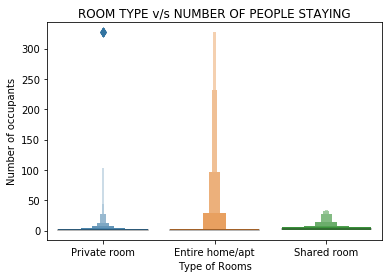

In [61]:
# fig, ax = plt.subplots(figsize=(12, 8))
a=sns.boxenplot(data=df, x="room_type", y="calculated_host_listings_count")
a.set_title('ROOM TYPE v/s NUMBER OF PEOPLE STAYING')
a.set_ylabel('Number of occupants')
a.set_xlabel('Type of Rooms')

#### Observation:

 - We observe that usually when the number of people is higher , bigger rooms are booked

# 7. Neighbourhood with most no. of hotels

In [62]:
df5 = df.groupby(['neighbourhood'],as_index=False).count()

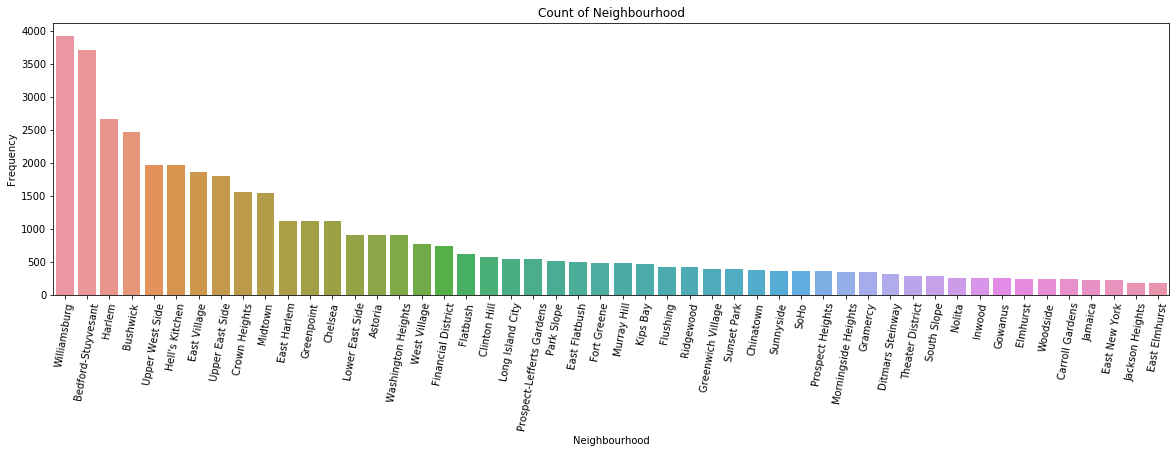

In [64]:
top_50_=Counter(df['neighbourhood']).most_common()
top_50_=top_50_[0:50]

plt.figure(figsize=(20,5))
a = sns.barplot(x='neighbourhood',y='count',data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
a.set_title('Count of Neighbourhood')
a.set_ylabel('Frequency')
a.set_xlabel('Neighbourhood')
a.set_xticklabels(ax_4.get_xticklabels(), rotation=80);
plt.show()

#### Observation:

- List of top 50 neighbourhood with most no. of hotels

# 8. No. of nights v/s No. of reviews 

Text(0.5, 0, 'Number of Reviews')

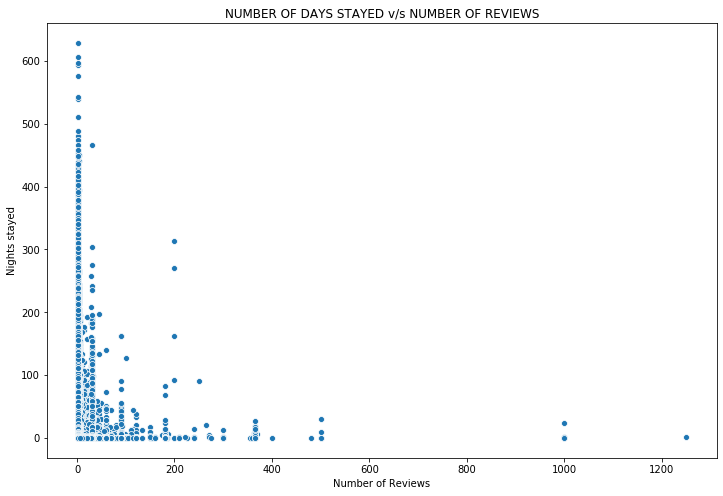

In [36]:
fig, ax = plt.subplots(figsize=(12, 8))
a=sns.scatterplot(data=df, x="minimum_nights", y="number_of_reviews")
a.set_title('NUMBER OF DAYS STAYED v/s NUMBER OF REVIEWS')
a.set_ylabel('Nights stayed')
a.set_xlabel('Number of Reviews')

#### Observation:

- We can see that the lower of no. of nights stays , higher is the review number
- This can also mean that people prefer to stay a lower number of days at hotels based on number of reviews given
- As number of nights to stay increase , number of review decrease , this can be due to two reasons:
    1. Lesser people stay at hotel for a long period of time
    2. People who stay longer give lesser reviews

# 9. Hotel Most Liked By People

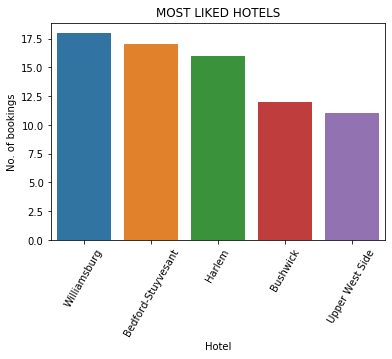

In [66]:
df1 = df.groupby(['name'],as_index=False).count().nlargest(5,'host_id')
df1 = df1[:5]
# plt.figure(figsize=(12,6))
a = sns.barplot(x='name',y='id',data = df1)
a.set_title('MOST LIKED HOTELS')
a.set_ylabel('No. of bookings')
a.set_xlabel('Hotel')
a.set_xticklabels(ax_4.get_xticklabels(), rotation=60);
plt.show()